# <a href="https://medium.com/@dishant.salunke9/understanding-the-chi-square-test-a-comprehensive-guide-f3bece83b920">Chi-Square Test</a>


## 1. Chi-Square Test for Independence:

This test determines whether there is a significant association between two categorical variables.

**Example: Is there a relationship between gender and voting prerence?**

**Formula**

**Chi-Square Test for Independence:**

𝜒² = ∑ ((Oᵢ - Eᵢ)² / Eᵢ)

- \( Oᵢ \): Observed frequency
- \( Eᵢ \): Expected frequency calculated as:
  Eᵢ = (Row Total × Column Total) / Grand Total

Chi-square statistic: 3.8571428571428577, p-value: 0.04953461343562649

There are two ways to show the results:

1. Using p-value - 
There is a significant association between Gender and Preference.

2. Using chi2 statistic - 
Critical value: 3.841458820694124
There is a significant association between Gender and Preference.



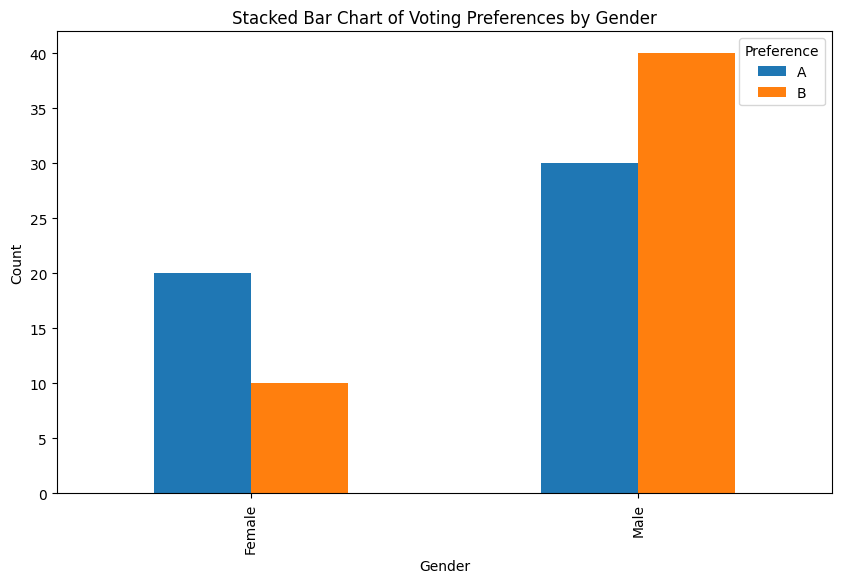

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data: Gender vs Voting Preference
data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Preference': ['A', 'A', 'B', 'B'],
    'Count': [30, 20, 40, 10]
})

# Contingency table
contingency_table = pd.pivot_table(data, values='Count', index='Gender', columns='Preference')

# Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p}")

# Output results using p-value
print("\nThere are two ways to show the results:\n")
print("1. Using p-value - ")
if p < 0.05:
    print("There is a significant association between Gender and Preference.")
else:
    print("There is no significant association between Gender and Preference.")

print("\n2. Using chi2 statistic - ")
critical_value = stats.chi2.ppf(0.95, dof)
print(f"Critical value: {critical_value}")

if chi2 > critical_value:
    print("There is a significant association between Gender and Preference.")
else:
    print("There is no significant association between Gender and Preference.")
print()
# Visualization
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Voting Preferences by Gender')
plt.legend(title='Preference')
plt.show()



<hr>
<hr>

## 2. Chi-Square Goodness of Fit Test:

This test determines whether the observed frequencies of a single categorical variable match the expected frequencies.


**Example: Is a die fair?**


**Chi-Square Goodness of Fit Test:**

𝜒² = ∑ ((Oᵢ - Eᵢ)² / Eᵢ)

- \( Oᵢ \): Observed frequency
- \( Eᵢ \): Expected frequency

Chi-square statistic: 5.120, p-value: 0.401

There are two ways to show the results:

1. Using p-value - 
	The die is fair.

2. Using chi2 statistic - 
Chi-square statistic: 5.12
Critical value: 11.07
	The die is fair.



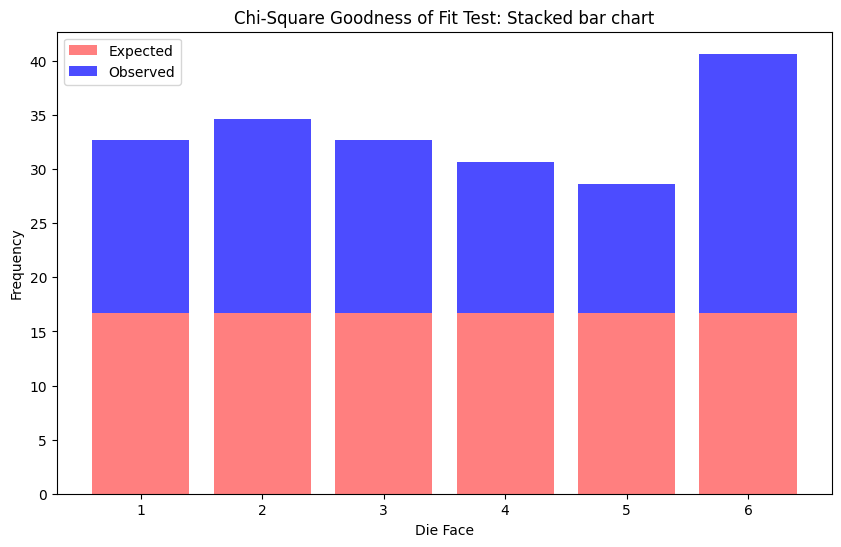

In [2]:
from scipy.stats import chisquare

# Observed frequencies of rolling a die
observed = [16, 18, 16, 14, 12, 24]

# Expected frequencies (assuming a fair die)
expected = [sum(observed) / len(observed)] * len(observed)

# Chi-Square Goodness of Fit Test
chi2_gof, p_gof = chisquare(observed, expected)

print(f"Chi-square statistic: {chi2_gof:.3f}, p-value: {p_gof:.3f}")
print("\nThere are two ways to show the results:\n")
print("1. Using p-value - ")
# Output results
if p_gof < 0.05:
    print("\tThe die is not fair.")
else:
    print("\tThe die is fair.")
# Degrees of freedom (number of categories - 1)
dof = len(observed) - 1

# Critical value from Chi-Square distribution for dof degrees of freedom at 0.05 significance level
critical_value_gof = stats.chi2.ppf(0.95, dof)
print("\n2. Using chi2 statistic - ")
print(f"Chi-square statistic: {chi2_gof:.2f}")
print(f"Critical value: {critical_value_gof:.2f}")

# Output results
if chi2_gof > critical_value_gof:
    print("\tThe die is not fair.")
else:
    print("\tThe die is fair.\n")


# Visualization
die_faces = ['1', '2', '3', '4', '5', '6']
plt.figure(figsize=(10, 6))
plt.bar(die_faces, expected, color='red', alpha=0.5, label='Expected' )
plt.bar(die_faces, observed, color='blue', alpha=0.7, label='Observed',bottom=expected)
plt.xlabel('Die Face')
plt.ylabel('Frequency')
plt.title('Chi-Square Goodness of Fit Test: Stacked bar chart')
plt.legend()
plt.show()